In [73]:
# Importing the required libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pathlib import Path
from pystreamlit import InsiderDataFrame
import pickle as pckl

#Supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
#stock="GOOG"

In [75]:
#instantiate insider class
#insider = InsiderDataFrame("insider_data_v2.csv")

# Instantiate the Insider Class
#stock_df = insider.get_processed_df(stock) 

# Droping any null values due to filing date being on a non trading day.
#stock_df = stock_df.dropna()


In [76]:
def logistic_regression_model(stock_df):
    # Import modules for Logistic Regression
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    # Create X, or features DataFrame
    features = stock_df[['Price','Qty','Value',"Owned","ΔOwn",'ClosePrice']]

    # Create y, or target DataFrame
    target = stock_df['Trend']

    # Use train_test_split to separate the data
    training_features, testing_features, training_targets, testing_targets = train_test_split(features, target, test_size=.3,random_state=7)


    #Scale the data
    scaler = StandardScaler()
    X_scaler = scaler.fit(training_features)
    training_features_scaled = X_scaler.transform(training_features)
    testing_features_scaled = X_scaler.transform(testing_features)

    #Instantiate a model
    logistic_regression_model = LogisticRegression(max_iter=1000,random_state=7)

    # Fit the model
    logistic_regression_model.fit(training_features_scaled, training_targets)


    # Generate predictions from the model we just fit
    predictions = logistic_regression_model.predict(training_features_scaled)

    # Convert those predictions (and actual values) to a DataFrame
    results_df = pd.DataFrame({"Prediction": predictions, "Actual": training_targets})

    # Apply the fitted model to the test dataset
    testing_predictions = logistic_regression_model.predict(testing_features_scaled)

    # Save both the test predictions and actual test values to a DataFrame
    results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": testing_targets})

    #Print the confusion matrix for training data
    training_matrix = confusion_matrix(training_targets, predictions)
    print("Confusion matrix for training data")
    print(training_matrix)
    # Plot the confusion matrix for Training data
    cmd = ConfusionMatrixDisplay(training_matrix)  
    cmd.plot()

    #Print the confusion matrix for testing data
    testing_matrix = confusion_matrix(testing_targets, testing_predictions)
    print("Confusion matrix for testing data")
    print(testing_matrix)
    # Print the confusion matrix for Testing data
    cmd = ConfusionMatrixDisplay(testing_matrix)  
    cmd.plot()

    # Classification report for training data
    training_report = classification_report(training_targets, predictions)
    # Then view its output
    print("---Classification report for training data----")
    print(training_report)

    # Classification report for training data
    testing_report = classification_report(testing_targets, testing_predictions)
    # Then view its output
    print("---Classification report for testing data----")
    print(testing_report)
    logistic_regression_model

    filename = f'./models/{stock}_logistics_model.sav'
    with open(filename,'wb') as file:
        pckl.dump(logistic_regression_model,file)

Confusion matrix for training data
[[55 25]
 [37 31]]
Confusion matrix for testing data
[[21  7]
 [23 13]]
---Classification report for training data----
              precision    recall  f1-score   support

         0.0       0.60      0.69      0.64        80
         1.0       0.55      0.46      0.50        68

    accuracy                           0.58       148
   macro avg       0.58      0.57      0.57       148
weighted avg       0.58      0.58      0.58       148

---Classification report for testing data----
              precision    recall  f1-score   support

         0.0       0.48      0.75      0.58        28
         1.0       0.65      0.36      0.46        36

    accuracy                           0.53        64
   macro avg       0.56      0.56      0.52        64
weighted avg       0.57      0.53      0.52        64

Confusion matrix for training data
[[141  23]
 [ 78  33]]
Confusion matrix for testing data
[[52 11]
 [48  8]]
---Classification report for traini

c:\Users\lmros\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lmros\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lmros\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Classification report for testing data----
              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52         7
         1.0       0.00      0.00      0.00        13

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20

Confusion matrix for training data
[[71 15]
 [45 34]]
Confusion matrix for testing data
[[29  4]
 [27 11]]
---Classification report for training data----
              precision    recall  f1-score   support

         0.0       0.61      0.83      0.70        86
         1.0       0.69      0.43      0.53        79

    accuracy                           0.64       165
   macro avg       0.65      0.63      0.62       165
weighted avg       0.65      0.64      0.62       165

---Classification report for testing data----
              precision    recall  f1-score   support

         0.0       0.52      0.88      0.65  

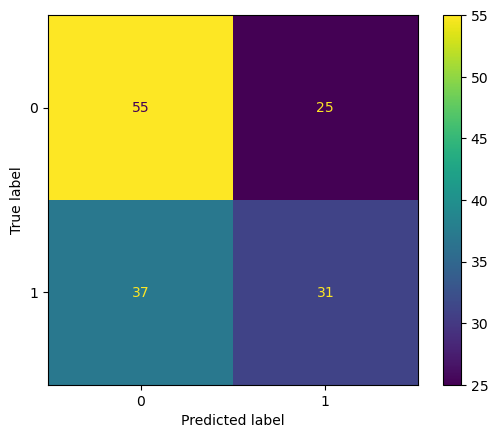

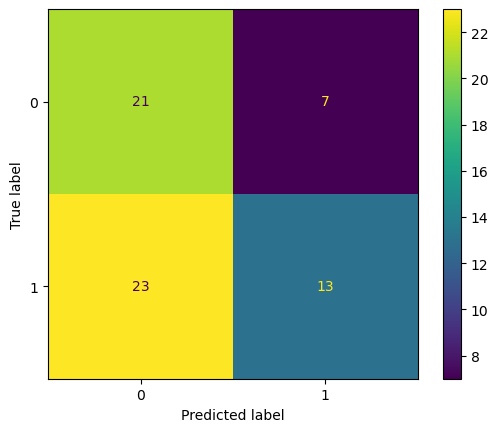

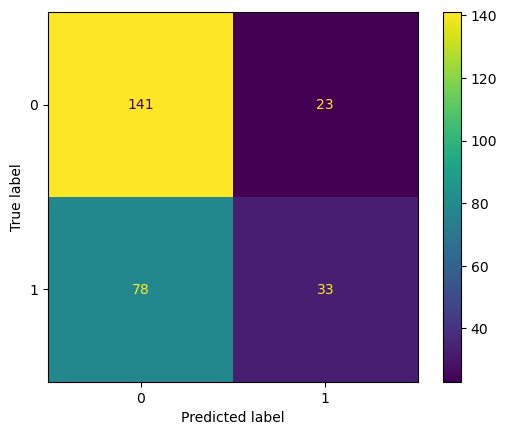

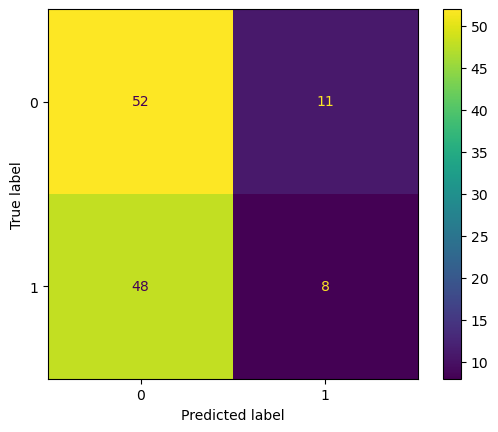

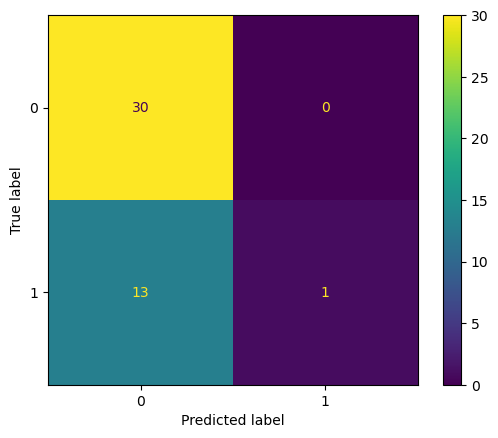

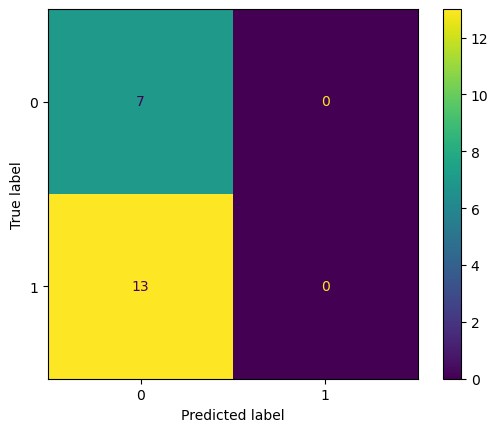

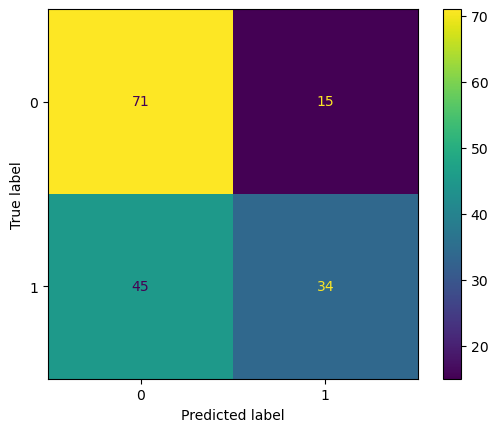

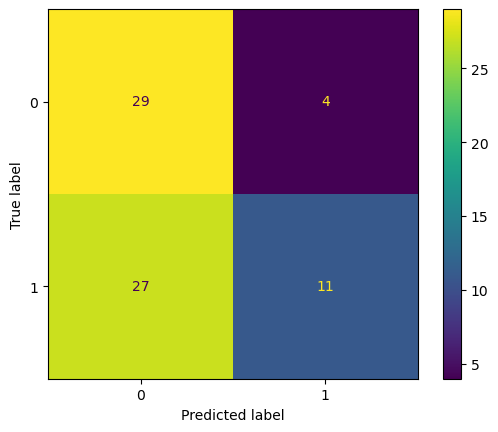

In [77]:
insider = InsiderDataFrame("insider_data_v2.csv")



for stock in ['AMZN','GOOG','MSFT','TSLA']:
    # Instantiate the Insider Class
    stock_df = insider.get_processed_df(stock) 

    # Droping any null values due to filing date being on a non trading day.
    stock_df = stock_df.dropna()
    # Calling the Logistic Regression Model
    logistic_regression_model(stock_df)

In [78]:

# Create charts for the stocks insider trading.
def create_charts():
    # Create a chart that shows all the insider trades for the stock
    stock_scatter_plot = stock_df.hvplot.scatter(y="Value",title=f"Insider Trades for {stock} by Date", ylabel="Value of Trades",rot=90, cmap="plasma").opts(yformatter='$%.0f')

    # Create a chart that shows the closing price on the insider trading days

    stock_insider_trades_plot = stock_df.hvplot.scatter(y="ClosePrice", color="orange", title=f"{stock} Insider Trades by Price", ylabel="Stock Price",rot=45, width=1000).opts(yformatter='$%.0f')
    
    # Create a chart to show the stock price overtime
    stock_price_df  = insider.df_tickers
    stock_price_df  = stock_price_df[stock].loc[pd.Timestamp(insider.fromdate):pd.Timestamp(insider.todate)]
    stock_price_plot = stock_price_df.hvplot(color="blue", title=f"{stock} Insider Trades and Stock Price", ylabel="Closing Price",rot=45, width=1000).opts(yformatter='$%.0f')

    #Overlay the stock price and the insider trading data
    overlay_stock_Plot = stock_price_plot * stock_insider_trades_plot


    #Visualize the signals

    # Visualize exit position relative to close price
    exit = stock_df[stock_df['Trend'] == -1.0]['ClosePrice'].hvplot.scatter(
        color='orange',
        marker='v',
        size=200,
        legend=False,
        ylabel='Price in $',
        width=1000,
        height=400
    )

    # Visualize entry position relative to close price
    entry = stock_df[stock_df['Trend'] == 1.0]['ClosePrice'].hvplot.scatter(
        color='purple',
        marker='^',
        size=200,
        legend=False,
        ylabel='Price in $',
        width=1000,
        height=400
    )

    # Visualize close price for the investment

    stock_price_df = insider.df_tickers[stock]

    security_close = stock_price_df.hvplot(
        line_color='grey',
        ylabel='Price in $',
        width=1000,
        height=400
    )


    # Create the overlay plot
    entry_exit_plot = security_close * entry * exit

    # Show the plot
    entry_exit_plot.opts(
        title=f"{stock} Entry and Exit Points and Price Movement"
)


    #Display the charts
    display(stock_scatter_plot)
    display(overlay_stock_Plot)
    display(entry_exit_plot)
   


In [79]:
# Create the charts for the stocks and trades for the stock
create_charts()

:Scatter   [index]   (Value)

:Overlay
   .Curve.TSLA :Curve   [index]   (TSLA)
   .Scatter.I  :Scatter   [index]   (ClosePrice)

:Overlay
   .Curve.TSLA            :Curve   [index]   (TSLA)
   .Scatter.ClosePrice.I  :Scatter   [index]   (ClosePrice)
   .Scatter.ClosePrice.II :Scatter   [index]   (ClosePrice)

In [80]:
def SVM_model(stock_df):

    # Get the Data ready for running the model

    # Import modules for Logistic Regression
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    from pandas.tseries.offsets import DateOffset
    import datetime as dt
    from sklearn import svm

    stock_df = stock_df.sort_index(ascending=True)

    # Create the X for testing
    X = stock_df[['Price','Qty','Value',"Owned","ΔOwn",'ClosePrice']].dropna().copy()


    y = stock_df['Trend'].copy()

    # Select the start of the training period
    training_begin = X.index.min() 

    # Select the ending period for the training data with an offset of 3 months
    training_end =  (X.index.min() + DateOffset(months=30)).date()


    # Generate the X_train and y_train DataFrames
    X_train = X.loc[training_begin:training_end]
    y_train = y.loc[training_begin:training_end]
        

    # Generate the X_test and y_test DataFrames
    X_test = X.loc[training_end:]
    y_test = y.loc[training_end:]


    # Generate the X_test and y_test DataFrames
    X_test = X.loc[training_end:]
    y_test = y.loc[training_end:]

    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Apply the scaler model to fit the X_train data
    X_scaler = scaler.fit(X_train)

    # Transform the X_train and X_test DataFrames using the X_scaler
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)  

    # Create the classifier model
    svm_model = svm.SVC()

    # Fit the model to the data using X_train_scaled and y_train
    svm_model = svm_model.fit(X_train_scaled, y_train)

    # Use the trained model to predict the trading signals for the training data
    testing_signal_predictions = svm_model.predict(X_test_scaled)

    # Use the trained model to predict the trading signals for the training data
    training_signal_predictions = svm_model.predict(X_train_scaled)

    # Display the sample predictions
    training_signal_predictions[:10]

    #Evaluate the model using a classification report - Testing
    training_report = classification_report(y_test, testing_signal_predictions)
    print("---Classification report for testing data----")
    print(training_report)

    # Evaluate the model using a classification report - Training
    training_report = classification_report(y_train, training_signal_predictions)
    print("---Classification report for training data---")
    print(training_report)
    filename = f'./models/{stock}_SVM_model.sav'
    with open(filename,'wb') as file:
        pckl.dump(logistic_regression_model,file)

In [81]:
# Calling the SVM  Model
#SVM_model(stock_df)
for stock in ['AMZN','GOOG','MSFT','TSLA']:
    # Instantiate the Insider Class
    stock_df = insider.get_processed_df(stock) 

    # Droping any null values due to filing date being on a non trading day.
    stock_df = stock_df.dropna()
    # Calling the Logistic Regression Model
    SVM_model(stock_df)

---Classification report for testing data----
              precision    recall  f1-score   support

         0.0       0.31      0.14      0.20        28
         1.0       0.52      0.74      0.61        35

    accuracy                           0.48        63
   macro avg       0.41      0.44      0.40        63
weighted avg       0.43      0.48      0.43        63

---Classification report for training data---
              precision    recall  f1-score   support

         0.0       0.64      0.91      0.75        80
         1.0       0.80      0.41      0.54        69

    accuracy                           0.68       149
   macro avg       0.72      0.66      0.65       149
weighted avg       0.71      0.68      0.65       149

---Classification report for testing data----
              precision    recall  f1-score   support

         0.0       0.54      0.97      0.69        68
         1.0       0.83      0.15      0.25        67

    accuracy                           0.56 